In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plot

In [ ]:
train_dataset = torchvision.datasets.MNIST(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 515kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.92MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.10MB/s]


In [ ]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
test_dataset = torchvision.datasets.MNIST(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

In [ ]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [ ]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

# Softmax calculated by CrossEntropy Loss function

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)

cuda:0


In [ ]:
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
# Check what we get
# The max value was [0, 255] and transformed to [0,1]

tmp_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=1,
    shuffle=True
)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  print(y)
  print(y.shape)
  break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0667, 0.6275, 0.9922, 1.0000, 0.9922, 0.6627, 0.1412,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.1176, 0.8941, 0.9882, 0.9882, 0.9922, 0.9882, 0.9882, 0.8588,
           0.4275, 0.0000, 0.0000, 0.0000, 

In [ ]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

In [ ]:
n_epochs = 10

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  train_loss = []
  for inputs, targets in train_loader:
    # move to GPU
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784) # Pass from shape [128, 1, 28, 28] to [128, 784]
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

  train_loss = np.mean(train_loss)

  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784) # Pass from shape [128, 1, 28, 28] to [128, 784]
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)

  train_losses[it] = train_loss
  test_losses[it] = test_loss

  print(f'Epoch {it}/{n_epochs}, Loss: {loss.item(): .4f}')

Epoch 0/10, Loss:  0.0626
Epoch 1/10, Loss:  0.0188
Epoch 2/10, Loss:  0.0105
Epoch 3/10, Loss:  0.0053
Epoch 4/10, Loss:  0.0029
Epoch 5/10, Loss:  0.0012
Epoch 6/10, Loss:  0.0006
Epoch 7/10, Loss:  0.0006
Epoch 8/10, Loss:  0.0003
Epoch 9/10, Loss:  0.0002


In [ ]:
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  inputs = inputs.view(-1, 784)

  outputs = model(inputs)
  _, predictions = torch.max(outputs, 1)

  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

for inputs, targets in test_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  inputs = inputs.view(-1, 784)

  outputs = model(inputs)
  _, predictions = torch.max(outputs, 1)

  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f"Train acc: {train_acc:.4f} Test acc: {test_acc:.4f}")

Train acc: 0.9897 Test acc: 0.9906


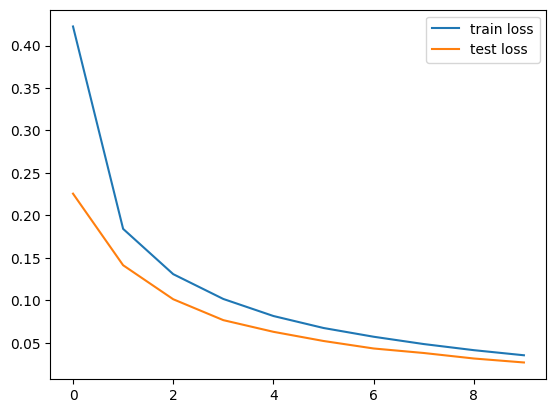

In [ ]:
plot.plot(train_losses, label="train loss")
plot.plot(test_losses, label="test loss")
plot.legend()
plot.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="COnfusion Matrix",
                          cmap=plot.cm.Blues
                          ):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized")
  else:
    print("Not Normalized")
  print(cm)

  plot.imshow(cm, interpolation="nearest", cmap=cmap)
  plot.title(title)
  tick_marks = np.arange(len(classes))
  plot.xticks(tick_marks, classes, rotation=45)
  plot.xticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plot.text(j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plot.tight_layout()
  plot.ylabel("True Label")
  plot.xlabel("Predicted Label")
  plot.show()


In [ ]:
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()

p_test = np.array([])

for inputs, targets in test_loader:
  inputs = inputs.to(device)

  inputs = inputs.view(-1, 784)
  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)

  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

In [ ]:
p_test

array([7., 2., 1., ..., 4., 5., 6.])

Not Normalized
[[ 979    0    0    0    0    0    1    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    0 1031    0    0    0    0    1    0    0]
 [   0    0    0 1009    0    0    0    1    0    0]
 [   0    0    0    0  977    0    0    0    0    5]
 [   0    1    0    7    0  882    0    0    0    2]
 [   1    3    0    1    0    0  953    0    0    0]
 [   0    1    0    0    0    0    0 1027    0    0]
 [   0    0    2    4    0    0    0    0  968    0]
 [   2    2    0    5    0    0    0    2    0  998]]


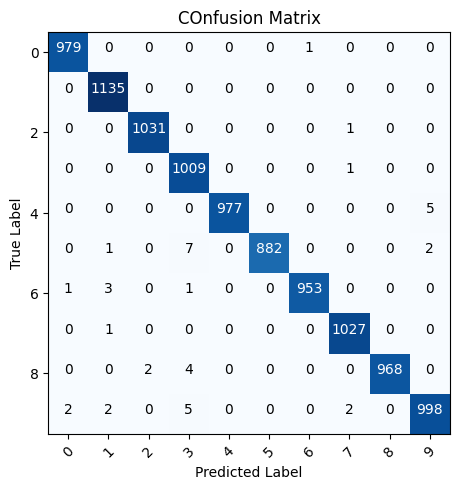

In [ ]:
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]


In [ ]:
misclassified_idx

array([ 115,  321,  340,  582, 1107, 1181, 1242, 1247, 1289, 1319, 1441,
       1500, 1709, 1878, 2053, 2109, 2130, 2135, 2293, 2387, 2648, 2654,
       2939, 3117, 3422, 3503, 3597, 3626, 3702, 3926, 4152, 4224, 4355,
       4860, 5937, 5972, 5982, 5997, 6024, 7216, 9679])

Text(0.5, 1.0, 'Predicted 3')

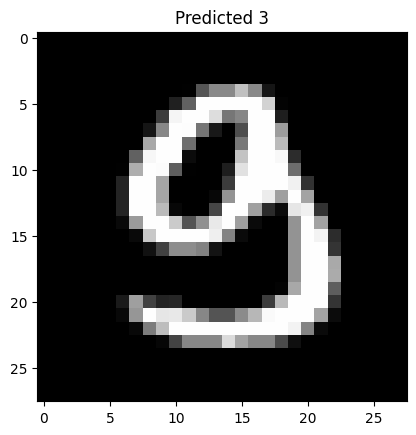

In [ ]:
i = np.random.choice(misclassified_idx)
plot.imshow(x_test[i], cmap="gray")
plot.title("Predicted %s" % int(p_test[i]))

In [ ]:
a = np.arange(4,10).reshape(2,3)

In [ ]:
a

array([[4, 5, 6],
       [7, 8, 9]])

In [ ]:
a == [4,8,9]

array([[ True, False, False],
       [False,  True,  True]])